# Timeseries Analysis of Appliance and Light Usage

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [12]:
# df for exploratory data
exp_df = df
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Exploratory Data Analysis

#### Attribute and Characteristics

In [ ]:
# column names
exp_df.columns

In [ ]:
# check for missing values
exp_df.isna().sum()

In [13]:
# check data types of each column
exp_df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

#### Visualize Data

In [ ]:
fig, ax = plt.subplots(4,5, figsize=(16,9))

ax[0,0].plot(exp_df['date'].loc[:100,], exp_df['T1'].loc[:100,])
ax[0,0].tick_params(labelbottom = False, bottom = False)
ax[0,0].set_ylabel('Temperature')
ax[1,0].plot(exp_df['date'].loc[:100,], exp_df['RH_1'].loc[:100,])
ax[1,0].tick_params(labelbottom = False, bottom = False)
ax[1,0].set_ylabel('Humidity')
ax[0,0].set_title('Kitchen Area')

ax[0,1].plot(exp_df['date'].loc[:100,], exp_df['T2'].loc[:100,])
ax[0,1].tick_params(labelbottom = False, bottom = False)
ax[1,1].plot(exp_df['date'].loc[:100,], exp_df['RH_2'].loc[:100,])
ax[1,1].tick_params(labelbottom = False, bottom = False)
ax[0,1].set_title('Living Area')

ax[0,2].plot(exp_df['date'].loc[:100,], exp_df['T3'].loc[:100,])
ax[0,2].tick_params(labelbottom = False, bottom = False)
ax[1,2].plot(exp_df['date'].loc[:100,], exp_df['RH_3'].loc[:100,])
ax[1,2].tick_params(labelbottom = False, bottom = False)
ax[0,2].set_title('Laundry Area')

ax[0,3].plot(exp_df['date'].loc[:100,], exp_df['T4'].loc[:100,])
ax[0,3].tick_params(labelbottom = False, bottom = False)
ax[1,3].plot(exp_df['date'].loc[:100,], exp_df['RH_4'].loc[:100,])
ax[1,3].tick_params(labelbottom = False, bottom = False)
ax[0,3].set_title('Office Area')

ax[0,4].plot(exp_df['date'].loc[:100,], exp_df['T5'].loc[:100,])
ax[0,4].tick_params(labelbottom = False, bottom = False)
ax[1,4].plot(exp_df['date'].loc[:100,], exp_df['RH_5'].loc[:100,])
ax[1,4].tick_params(labelbottom = False, bottom = False)
ax[0,4].set_title('Bathroom')

ax[2,0].plot(exp_df['date'].loc[:100,], exp_df['Appliances'].loc[:100,])
ax[2,0].tick_params(labelbottom = False, bottom = False)
ax[2,0].set_ylabel('Energy (Wh)')
ax[2,0].set_title('Appliances')
ax[3,0].plot(exp_df['date'].loc[:100,], exp_df['lights'].loc[:100,])
ax[3,0].tick_params(labelbottom = False, bottom = False)
ax[3,0].set_ylabel('Energy (Wh)')
ax[3,0].set_title('Lights')
ax[3,0].set_xlabel('Time (mins)')

ax[2,1].plot(exp_df['date'].loc[:100,], exp_df['T8'].loc[:100,])
ax[2,1].tick_params(labelbottom = False, bottom = False)
ax[2,1].set_ylabel('Temperature')
ax[3,1].plot(exp_df['date'].loc[:100,], exp_df['RH_8'].loc[:100,])
ax[3,1].set_xlabel('Time (mins)')
ax[3,1].set_ylabel('Humidity')
ax[3,1].tick_params(labelbottom = False, bottom = False)
ax[2,1].set_title('Teenager Room')

ax[2,2].plot(exp_df['date'].loc[:100,], exp_df['T3'].loc[:100,])
ax[2,2].tick_params(labelbottom = False, bottom = False)
ax[3,2].plot(exp_df['date'].loc[:100,], exp_df['RH_3'].loc[:100,])
ax[3,2].tick_params(labelbottom = False, bottom = False)
ax[3,2].set_xlabel('Time (mins)')
ax[2,2].set_title('Parents Room')

ax[2,3].plot(exp_df['date'].loc[:100,], exp_df['T6'].loc[:100,])
ax[2,3].tick_params(labelbottom = False, bottom = False)
ax[3,3].plot(exp_df['date'].loc[:100,], exp_df['RH_6'].loc[:100,])
ax[3,3].tick_params(labelbottom = False, bottom = False)
ax[3,3].set_xlabel('Time (mins)')
ax[2,3].set_title('Outside Building')

ax[2,4].plot(exp_df['date'].loc[:100,], exp_df['T7'].loc[:100,])
ax[2,4].tick_params(labelbottom = False, bottom = False)
ax[3,4].plot(exp_df['date'].loc[:100,], exp_df['RH_7'].loc[:100,])
ax[3,4].tick_params(labelbottom = False, bottom = False)
ax[3,4].set_xlabel('Time (mins)')
ax[2,4].set_title('Ironing Room')


plt.tight_layout()

In [ ]:
#looking at Temperature columns
# regex = '^T' means starts with T
filt = exp_df.filter(regex='^T', axis='columns').corr()
ax = plt.axes()
sns.heatmap(filt.corr(), ax = ax)
ax.set_title('Room Temperature Correlation')
plt.show()

In [ ]:
#looking at Relative Humidity columns
# regex = '^R' means starts with R
filt = exp_df.filter(regex='^R', axis='columns').corr()
ax = plt.axes()
sns.heatmap(filt.corr(), ax = ax)
ax.set_title('Room Relative Humidity Correlation')
plt.show()

#### Initial EDA Observations

There are many basic relationships we are able to see just from our exploratory data analysis. For example, in the line graphs we can see the trends of energy usage by appliances and lights in the bottom left hand column. In the right above their graphs, we can see the temperature and relative humidity of the kitchen (chosen since many appliances are in this one room). Based on the graphs of all the rooms, we can see there is an overall spike and decline. Look more closely though, and we see these spikes and declines are not all the same. Interestingly, the graphs of the appliances and lights have a greater amount of spikes and variations then most rooms.<br/><br/>
Upon first glance, these correlation plots reveal a few interesting things. It appears there is not as much of a correlation between temperature and the appliance and lights as there is for relative humidity and appliances and lights. <br/><br/>
Just from these two plots, we hypothesize that relative humidity has a stronger impact on the energy usage of lights rather than appliances. On the flipside, we hypothesize temperature has a stronger impact on the energy usage of appliances than lights.   

### Prepare the Data

#### Data Transformation - Univariate

In [4]:
prep_df = df

In [5]:
prep_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
appli_df = df
# already have date as datetime
# appli_df['date'] = pd.to_datetime(appli_df.date)

In [16]:
appli_df = df.iloc[:,[0,1]]
appli_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


Text(0.5, 0, 'Time (min)')

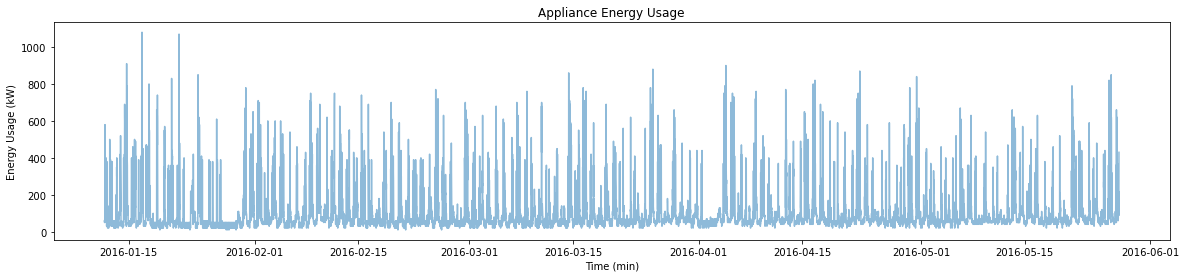

In [26]:
plt.figure(figsize=(20,4))
plt.plot(appli_df.date, appli_df.Appliances, alpha = 0.5)
plt.title('Appliance Energy Usage')
plt.ylabel('Energy Usage (kW)')
plt.xlabel('Time (min)')